In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/YOLOv3

/content/gdrive/MyDrive/YOLOv3


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14691, done.
remote: Total 14691 (delta 0), reused 0 (delta 0), pack-reused 14691
Receiving objects: 100% (14691/14691), 13.24 MiB | 7.36 MiB/s, done.
Resolving deltas: 100% (10000/10000), done.
Checking out files: 100% (2023/2023), done.


In [3]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [4]:
# change makefile to have GPU and OPENCV enabled
%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/gdrive/MyDrive/YOLOv3/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [5]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv

In [ ]:
%cd ..
!ls

/content/gdrive/My Drive/YOLOv3
backup		   obj.zip				     yolov3.cfg
darknet		   test.zip
darknet53.conv.74  training-and_detection_with_YOLOv3.ipynb


In [ ]:
!unzip obj.zip -d darknet/data

Archive:  obj.zip
   creating: darknet/data/obj/
  inflating: darknet/data/obj/c05e6c6ec8c32eed.jpg  
  inflating: darknet/data/obj/bcb61030a0f68ed0.jpg  
  inflating: darknet/data/obj/5dfb240d724952c2.jpg  
  inflating: darknet/data/obj/7787a1ef66b6ead3.jpg  
  inflating: darknet/data/obj/02c89736672b1627.jpg  
  inflating: darknet/data/obj/430ed7588ce14a75.jpg  
  inflating: darknet/data/obj/76b573d84632cff1.jpg  
  inflating: darknet/data/obj/a42e3c487b22f7e1.jpg  
  inflating: darknet/data/obj/44dbe82fc33e46e0.jpg  
  inflating: darknet/data/obj/98b85e3d2e45a8ab.jpg  
  inflating: darknet/data/obj/579567d3d0be6e44.jpg  
  inflating: darknet/data/obj/0d9401650c319e9c.jpg  
  inflating: darknet/data/obj/692716ac5195079a.jpg  
  inflating: darknet/data/obj/3a8f2e04fc26f829.jpg  
  inflating: darknet/data/obj/3c819f1920df81e0.jpg  
  inflating: darknet/data/obj/417e8bcbbef75dab.jpg  
  inflating: darknet/data/obj/15fd04585041759d.jpg  
  inflating: darknet/data/obj/637ca42b516dfbbe.jpg

In [ ]:
!unzip test.zip -d darknet/data/

Archive:  test.zip
   creating: darknet/data/test/
  inflating: darknet/data/test/4ff0745d5aece980.jpg  
  inflating: darknet/data/test/4ff0745d5aece980.txt  
  inflating: darknet/data/test/5b00589fc9a65024.jpg  
  inflating: darknet/data/test/5b00589fc9a65024.txt  
  inflating: darknet/data/test/8f84ab3cde2b9374.jpg  
  inflating: darknet/data/test/8f84ab3cde2b9374.txt  
  inflating: darknet/data/test/14a7fbad2d02e768.jpg  
  inflating: darknet/data/test/14a7fbad2d02e768.txt  
  inflating: darknet/data/test/34b8358262d2a434.jpg  
  inflating: darknet/data/test/34b8358262d2a434.txt  
  inflating: darknet/data/test/036cf898c6176afd.jpg  
  inflating: darknet/data/test/036cf898c6176afd.txt  
  inflating: darknet/data/test/61f6957998b30a34.jpg  
  inflating: darknet/data/test/61f6957998b30a34.txt  
  inflating: darknet/data/test/71a4dd0497fe28e6.jpg  
  inflating: darknet/data/test/71a4dd0497fe28e6.txt  
  inflating: darknet/data/test/0077f8de643853ca.jpg  
  inflating: darknet/data/test/

In [ ]:
%cd darknet/
!ls

/content/gdrive/MyDrive/YOLOv3/darknet
3rdparty		 darknet_images.py	net_cam_v3.sh
backup			 darknet.py		net_cam_v4.sh
build			 darknet_video.py	obj
build.ps1		 data			README.md
build.sh		 generate_test.py	results
cfg			 generate_train.py	scripts
chart.png		 image_yolov3.sh	src
chart_yolov3-custom.png  image_yolov4.sh	vcpkg.json
cmake			 include		video_yolov3.sh
CMakeLists.txt		 json_mjpeg_streams.sh	video_yolov4.sh
darknet			 LICENSE
DarknetConfig.cmake.in	 Makefile


In [ ]:
!cp cfg/yolov3.cfg /content/gdrive/MyDrive/YOLOv3/

In [ ]:
# to download to local machine (change its name to yolov3-obj.cfg once it's downloaded)
download('cfg/yolov3.cfg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python3 generate_train.py
!python3 generate_test.py

In [ ]:
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt


In [ ]:
%cd ..
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

/content/gdrive/MyDrive/YOLOv3
--2021-01-30 20:40:13--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  10.1MB/s    in 15s     

2021-01-30 20:40:28 (10.6 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
%cd darknet/
!ls

/content/gdrive/MyDrive/YOLOv3/darknet
3rdparty		 darknet_images.py	net_cam_v3.sh
backup			 darknet.py		net_cam_v4.sh
build			 darknet_video.py	obj
build.ps1		 data			README.md
build.sh		 generate_test.py	results
cfg			 generate_train.py	scripts
chart.png		 image_yolov3.sh	src
chart_yolov3-custom.png  image_yolov4.sh	vcpkg.json
cmake			 include		video_yolov3.sh
CMakeLists.txt		 json_mjpeg_streams.sh	video_yolov4.sh
darknet			 LICENSE
DarknetConfig.cmake.in	 Makefile


In [ ]:
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg /content/gdrive/MyDrive/YOLOv3/darknet53.conv.74 -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.792945), count: 12, class_loss = 1.821723, iou_loss = 0.633035, total_loss = 2.454758 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.602490), count: 7, class_loss = 0.550988, iou_loss = 0.498370, total_loss = 1.049358 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.762670), count: 7, class_loss = 0.561723, iou_loss = 0.363102, total_loss = 0.924825 
 total_bbox = 760729, rewritten_bbox = 0.580101 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.774199), count: 10, class_loss = 0.546018, iou_loss = 0.450422, total_loss = 0.996440 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.005693, iou_loss = 0.000000, total_loss = 0.005693 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1

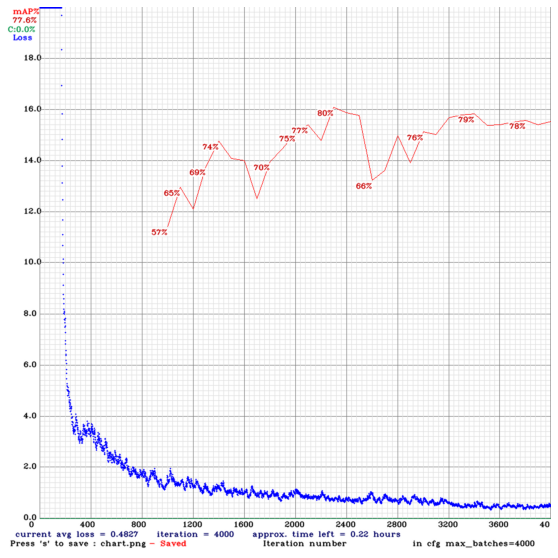

In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

In [ ]:
!ls

3rdparty		 darknet_images.py	net_cam_v3.sh
backup			 darknet.py		net_cam_v4.sh
build			 darknet_video.py	obj
build.ps1		 data			README.md
build.sh		 generate_test.py	results
cfg			 generate_train.py	scripts
chart.png		 image_yolov3.sh	src
chart_yolov3-custom.png  image_yolov4.sh	vcpkg.json
cmake			 include		video_yolov3.sh
CMakeLists.txt		 json_mjpeg_streams.sh	video_yolov4.sh
darknet			 LICENSE
DarknetConfig.cmake.in	 Makefile


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, out

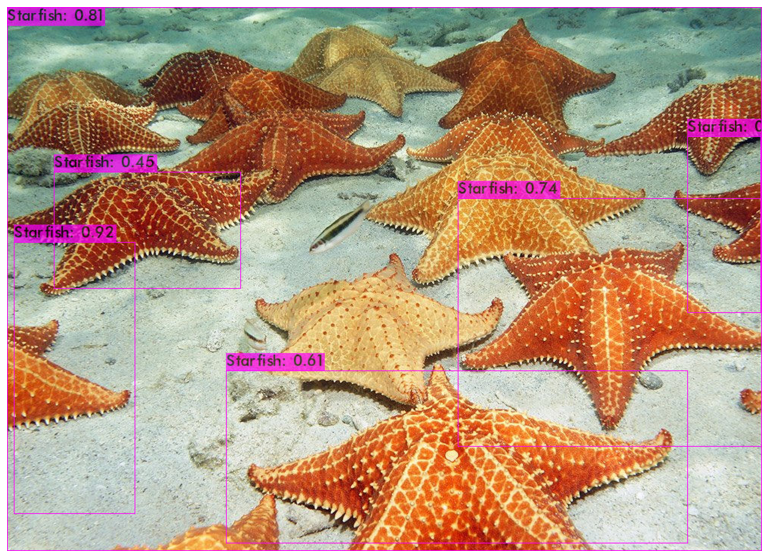

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3-custom_test.cfg /content/gdrive/MyDrive/YOLOv3/backup/yolov3-custom_best.weights /content/gdrive/MyDrive/YOLOv3/test_imajes/starfish.jpg -dont_show
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, out

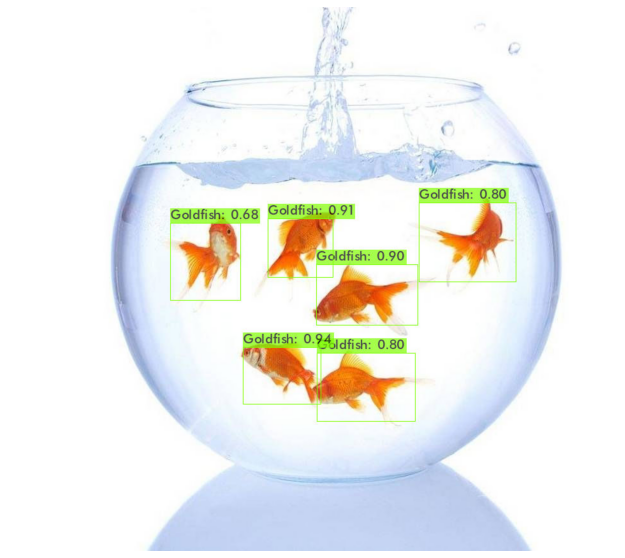

In [6]:
!./darknet detector test data/obj.data cfg/yolov3-custom_test.cfg /content/gdrive/MyDrive/YOLOv3/backup/yolov3-custom_best.weights /content/gdrive/MyDrive/YOLOv3/test_imajes/goldfish.jpeg -dont_show
imShow('predictions.jpg')

In [ ]:
!ls


3rdparty		 darknet_images.py	net_cam_v3.sh
backup			 darknet.py		net_cam_v4.sh
build			 darknet_video.py	obj
build.ps1		 data			predictions.jpg
build.sh		 generate_test.py	README.md
cfg			 generate_train.py	results
chart.png		 image_yolov3.sh	scripts
chart_yolov3-custom.png  image_yolov4.sh	src
cmake			 include		vcpkg.json
CMakeLists.txt		 json_mjpeg_streams.sh	video_yolov3.sh
darknet			 LICENSE		video_yolov4.sh
DarknetConfig.cmake.in	 Makefile


In [ ]:
!./darknet detector map data/ cfg/yolov3-custom_test.cfg /content/gdrive/MyDrive/YOLOv3/backup/yolov3-custom_final.weights


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
valid: Using default 'data/train.txt'
names: Using default 'data/names.list'
Couldn't open file: data/names.list
